In [13]:
%run func_def.ipynb

**imports loaded.

> File management func:
    get_content(directory)

> Pre-Processing func:
    get_striking_efficiency(name, date)
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_dept

# Card file (get Path from user)

In [2]:
CARDS_PATH = '../..\\[3] web_scrappers/cards/'
DATA_PATH = '../data/'

# main()

### Get last Odds & cards files

In [3]:
get_content(CARDS_PATH)

['../..\\[3] web_scrappers/cards/.ipynb_checkpoints/',
 '../..\\[3] web_scrappers/cards/darftking_odds_06-29-2023.csv',
 '../..\\[3] web_scrappers/cards/darftking_odds_07-02-2023.csv',
 '../..\\[3] web_scrappers/cards/darftking_odds_07-03-2023.csv',
 '../..\\[3] web_scrappers/cards/ufc_card_06-17-2023.csv',
 '../..\\[3] web_scrappers/cards/ufc_card_07-01-2023.csv',
 '../..\\[3] web_scrappers/cards/ufc_card_07-08-2023.csv',
 '../..\\[3] web_scrappers/cards/ufc_card_07-15-2023.csv']

In [4]:
odds_files = pd.DataFrame(columns=['filename','date'])
cards_files = pd.DataFrame(columns=['filename','date'])

for file in get_content(directory=CARDS_PATH):
    filename = file.split('/')[-1]
    
    if 'darftking_odds' in filename:
        date = filename.split('_')[-1].split('.')[-2]
        odds_files.loc[len(odds_files)] = [filename,date]
        
    if 'ufc_card' in filename:
        date = filename.split('_')[-1].split('.')[-2]
        cards_files.loc[len(cards_files)] = [filename,date]    
        
cards_files = cards_files.sort_values(by='date',ascending=False).reset_index(drop=True) 
odds_files = odds_files.sort_values(by='date',ascending=False).reset_index(drop=True) 
odds_files

,filename,date
0,darftking_odds_07-03-2023.csv,07-03-2023
1,darftking_odds_07-02-2023.csv,07-02-2023
2,darftking_odds_06-29-2023.csv,06-29-2023


In [5]:
cards_files

,filename,date
0,ufc_card_07-15-2023.csv,07-15-2023
1,ufc_card_07-08-2023.csv,07-08-2023
2,ufc_card_07-01-2023.csv,07-01-2023
3,ufc_card_06-17-2023.csv,06-17-2023


In [6]:
# get odds data frame:
print(f"Draftking odds file: <{odds_files.loc[0,'filename']}>")
odds = pd.read_csv(CARDS_PATH + odds_files.loc[0,'filename'])

#get card data frame:
print(f"Upcoming Cards file: <{cards_files.loc[0,'filename']}>")
cards = pd.read_csv(CARDS_PATH + cards_files.loc[0,'filename'])

Draftking odds file: <darftking_odds_07-03-2023.csv>
Upcoming Cards file: <ufc_card_07-15-2023.csv>


In [7]:
get_odds(data=odds,fighter='Yair Rodriguez',opponent='Alexander Volkanovski')

{'Alexander Volkanovski': '−410', 'Yair Rodriguez': '+310'}

In [8]:
cards['fighter_odds'] = None
cards['opponent_odds'] = None

for i in range(len(cards)):
    fighter,opponent = cards.loc[i,'fighter'],cards.loc[i,'opponent']
    odd = get_odds(fighter=fighter,opponent=opponent, data=odds)
    if odd != None:
        cards.loc[i,'fighter_odds'] = odd[fighter]
        cards.loc[i,'opponent_odds'] = odd[opponent]

cards = cards.loc[~cards.fighter_odds.isna(),['fighter','fighter_odds','opponent','opponent_odds','weight_class','event_name']].reset_index(drop=True)
cards

,fighter,fighter_odds,opponent,opponent_odds,weight_class,event_name
0,Alexander Volkanovski,−410,Yair Rodriguez,+310,Featherweight,UFC 290: Volkanovski vs. Rodriguez
1,Brandon Moreno,−200,Alexandre Pantoja,+170,Flyweight,UFC 290: Volkanovski vs. Rodriguez
2,Robert Whittaker,−410,Dricus Du Plessis,+310,Middleweight,UFC 290: Volkanovski vs. Rodriguez
3,Jalin Turner,−255,Dan Hooker,+205,Lightweight,UFC 290: Volkanovski vs. Rodriguez
4,Bo Nickal,−1250,Tresean Gore,+800,Middleweight,UFC 290: Volkanovski vs. Rodriguez
5,Robbie Lawler,+215,Niko Price,−255,Welterweight,UFC 290: Volkanovski vs. Rodriguez
6,Yazmin Jauregui,−390,Denise Gomes,+320,Women's Strawweight,UFC 290: Volkanovski vs. Rodriguez
7,Jimmy Crute,−115,Alonzo Menifield,−105,Light Heavyweight,UFC 290: Volkanovski vs. Rodriguez
8,Vitor Petrino,−275,Marcin Prachnio,+230,Light Heavyweight,UFC 290: Volkanovski vs. Rodriguez
9,Cameron Saaiman,−450,Terrence Mitchell,+340,Bantamweight,UFC 290: Volkanovski vs. Rodriguez


### Load data:

In [9]:
df = pd.read_csv(DATA_PATH + 'data_features_outliers_detected.csv')
stats = pd.read_csv(DATA_PATH + 'data_fighters_stats_processed.csv')

### Load models:

In [10]:
stat_pred = load_trained_model(file_path='../global_variables/stats_pred_general_xgboost_reg.pkl')
result_pred = load_trained_model(file_path='../global_variables/result_pred_general_logistic_reg.pkl')
method_pred = load_trained_model(file_path='../global_variables/method_pred_knn_classifier.pkl')

### Set matches:

In [14]:
data = []
for i in range(len(cards)):
    fighter = cards.loc[i,'fighter']
    opponent = cards.loc[i,'opponent']
    fighter_stats = stats[stats.name==fighter]
    opponent_stats = stats[stats.name==opponent]

    if (len(fighter_stats) > 0) & (len(opponent_stats) > 0):
        match = {'result':None,
             'fighter':fighter_stats['name'].tolist().pop(),
             'opponent':opponent_stats['name'].tolist().pop(),
             'date':None,
             'weight_class':cards[(cards.fighter==fighter)&(cards.opponent==opponent)]['weight_class'].tolist().pop(),
             'method':None,
             'type':None,
             'kd_dif':None,
             'str_dif':None,
             'td_dif':None,
             'sub_dif':None,
             'td_avg_dif':round(fighter_stats['td_avg'].tolist().pop() - opponent_stats['td_avg'].tolist().pop(),4),
             'td_def_dif':round(fighter_stats['td_def'].tolist().pop() - opponent_stats['td_def'].tolist().pop(),4),
             'sub_avg_dif':round(fighter_stats['sub_avg'].tolist().pop() - opponent_stats['sub_avg'].tolist().pop(),4),
             'slpm_dif':round(fighter_stats['slpm'].tolist().pop() - opponent_stats['slpm'].tolist().pop(),4),
             'str_acc_dif':round(fighter_stats['str_acc'].tolist().pop() - opponent_stats['str_acc'].tolist().pop(),4),
             'sapm_dif':round(fighter_stats['sapm'].tolist().pop() - opponent_stats['sapm'].tolist().pop(),4),
             'str_def_dif':round(fighter_stats['str_def'].tolist().pop() - opponent_stats['str_def'].tolist().pop(),4),
             'str_efc_dif':0,
             'stance_win_ratio':get_stance_wins_ratio(fighter=fighter, stats_data=stats) - get_stance_wins_ratio(fighter=opponent, stats_data=stats),
             'win_perc_dif':round(get_win_prob(name=fighter, date=get_current_date(), df=df) - get_win_prob(name=opponent, date=get_current_date(), df=df),4),
             'win_strk_dif':get_win_streak(name=fighter, date=get_current_date(), df=df) - get_win_streak(name=opponent, date=get_current_date(), df=df),
             'lose_strk_dif':get_lose_streak(name=fighter, date=get_current_date(), df=df) - get_lose_streak(name=opponent, date=get_current_date(), df=df),
             'outlier':None,
             'lof_outlier':None
            }
        data.append(match)
    else:
        print(f"(Match error)Data found: {fighter}={len(fighter_stats)>0} vs {opponent}={len(opponent_stats)>0}")
        
data = pd.DataFrame.from_dict(data)     
data

(Match error)Data found: Cameron Saaiman=True vs Terrence Mitchell=False


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,None,Alexander Volkanovski,Yair Rodriguez,None,Featherweight,None,None,None,None,None,None,0.73,0.06,-0.6,1.57,0.10,-0.63,0.06,0,0.0000,0.0385,4,-2,None,None
1,None,Brandon Moreno,Alexandre Pantoja,None,Flyweight,None,None,None,None,None,None,0.43,0.00,-0.6,-0.70,-0.08,-0.19,0.02,0,0.0000,-0.1667,0,0,None,None
2,None,Robert Whittaker,Dricus Du Plessis,None,Middleweight,None,None,None,None,None,None,-2.01,0.34,-1.3,-2.24,-0.13,-0.47,0.08,0,-0.0475,0.3789,3,-1,None,None
3,None,Jalin Turner,Dan Hooker,None,Lightweight,None,None,None,None,None,None,0.04,-0.07,1.3,0.80,-0.01,-0.82,-0.08,0,-0.0318,0.2982,0,-2,None,None
4,None,Bo Nickal,Tresean Gore,None,Middleweight,None,None,None,None,None,None,9.46,-0.81,14.4,-1.37,0.04,-5.92,0.19,0,-0.0318,0.6667,0,0,None,None
5,None,Robbie Lawler,Niko Price,None,Welterweight,None,None,None,None,None,None,-0.05,0.01,-0.7,-1.65,0.04,-0.90,0.11,0,0.0157,0.1472,0,-3,None,None
6,None,Yazmin Jauregui,Denise Gomes,None,Women's Strawweight,None,None,None,None,None,None,-1.19,0.50,-1.2,1.68,-0.06,1.10,0.02,0,0.0000,0.0000,0,-1,None,None
7,None,Jimmy Crute,Alonzo Menifield,None,Light Heavyweight,None,None,None,None,None,None,4.52,-0.15,2.1,-0.21,-0.02,0.00,-0.07,0,0.0000,0.1270,4,-1,None,None
8,None,Vitor Petrino,Marcin Prachnio,None,Light Heavyweight,None,None,None,None,None,None,4.45,0.04,0.6,-2.27,-0.06,-1.10,-0.08,0,0.0000,-0.7143,-4,1,None,None
9,None,Kamuela Kirk,Esteban Ribovics,None,Lightweight,None,None,None,None,None,None,0.86,0.06,0.4,-1.80,0.02,2.01,-0.19,0,0.0475,0.0000,0,2,None,None


# Statistics predictions:

In [15]:
data[['kd_dif','str_dif','td_dif','sub_dif']] = stat_pred.predict(data[stat_pred.feature_names_in_])
data['result'] = result_pred.predict(data[result_pred.feature_names_in_])
data['win_prob'] = np.max(result_pred.predict_proba(data[result_pred.feature_names_in_]),axis=1)

In [16]:
for i in range(len(data)):
    data.loc[i,'result'] = int(1) if data.loc[i,'result'] == 'win' else int(0)

data.tail(3)    

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,win_prob
18,0,Stephen Thompson,Michel Pereira,None,Welterweight,None,None,0.153914,-0.042355,-1.293646,-0.399241,-1.31,-0.30,-0.6,-0.89,-0.09,-0.74,-0.03,0,0.0000,0.1471,1,-1,None,None,0.782849
19,0,Aljamain Sterling,Sean O'Malley,None,Bantamweight,None,None,-0.312748,-0.654732,0.455801,0.326119,1.57,-0.15,0.3,-2.65,-0.08,-1.17,-0.04,0,-0.0475,0.0556,1,-1,None,None,0.730443
20,0,Alexa Grasso,Valentina Shevchenko,None,Women's Flyweight,None,None,0.008782,-1.109372,-1.286371,0.456137,-2.19,-0.11,0.3,1.59,-0.10,2.08,-0.04,0,-0.0157,0.2606,3,-3,None,None,0.932281


In [17]:
data['method'] = method_pred.predict(data[method_pred.feature_names_in_])
data['method_prob'] = np.max(method_pred.predict_proba(data[method_pred.feature_names_in_]),axis=1)

In [18]:
for i in range(len(data)):
    data.loc[i,'result'] = 'win' if data.loc[i,'result'] == int(1) else 'lose'

data.tail(3)    

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,win_prob,method_prob
18,lose,Stephen Thompson,Michel Pereira,None,Welterweight,decision,None,0.153914,-0.042355,-1.293646,-0.399241,-1.31,-0.30,-0.6,-0.89,-0.09,-0.74,-0.03,0,0.0000,0.1471,1,-1,None,None,0.782849,0.61
19,lose,Aljamain Sterling,Sean O'Malley,None,Bantamweight,decision,None,-0.312748,-0.654732,0.455801,0.326119,1.57,-0.15,0.3,-2.65,-0.08,-1.17,-0.04,0,-0.0475,0.0556,1,-1,None,None,0.730443,0.46
20,lose,Alexa Grasso,Valentina Shevchenko,None,Women's Flyweight,decision,None,0.008782,-1.109372,-1.286371,0.456137,-2.19,-0.11,0.3,1.59,-0.10,2.08,-0.04,0,-0.0157,0.2606,3,-3,None,None,0.932281,0.57


# Final results:

In [19]:
data_present = data.copy()
for i in range(len(data)):
    data_present.loc[i,'result'] = data_present.loc[i,'fighter'] if data_present.loc[i,'result'] == 'win' else data_present.loc[i,'opponent']
    
data_present = data_present.rename(columns={'result':'predicted_winner'})    

In [21]:
data_present = data_present[['fighter','opponent','weight_class','predicted_winner','win_prob','method','method_prob','str_dif','kd_dif','td_dif','sub_dif']]
data_present.to_csv( '../cards_predictions/' + CARDS_PATH.split('/')[-1][:-4] + '_prediction_set.csv', index=None)
data_present

,fighter,opponent,weight_class,predicted_winner,win_prob,method,method_prob,str_dif,kd_dif,td_dif,sub_dif
0,Alexander Volkanovski,Yair Rodriguez,Featherweight,Alexander Volkanovski,0.936264,decision,0.48,0.221572,1.556788,0.396058,0.032997
1,Brandon Moreno,Alexandre Pantoja,Flyweight,Brandon Moreno,0.620310,decision,0.54,-0.083381,0.251936,0.552591,-0.179277
2,Robert Whittaker,Dricus Du Plessis,Middleweight,Dricus Du Plessis,0.599739,knockout,0.38,-0.869020,1.219549,-0.009818,-0.993415
3,Jalin Turner,Dan Hooker,Lightweight,Jalin Turner,0.890058,decision,0.52,0.831887,0.512551,-0.418363,0.573490
4,Bo Nickal,Tresean Gore,Middleweight,Tresean Gore,0.642531,submission,0.42,0.426707,-0.070099,0.740575,0.341118
5,Robbie Lawler,Niko Price,Welterweight,Robbie Lawler,0.542768,decision,0.50,-0.043343,0.358511,0.448005,-0.575030
6,Yazmin Jauregui,Denise Gomes,Women's Strawweight,Yazmin Jauregui,0.830905,decision,0.54,0.611113,1.072020,-1.200253,0.036269
7,Jimmy Crute,Alonzo Menifield,Light Heavyweight,Jimmy Crute,0.742416,decision,0.52,-0.209906,-0.127663,1.689981,0.334495
8,Vitor Petrino,Marcin Prachnio,Light Heavyweight,Marcin Prachnio,0.700192,decision,0.48,-0.501961,-0.542952,1.351420,0.470931
9,Kamuela Kirk,Esteban Ribovics,Lightweight,Esteban Ribovics,0.912847,decision,0.63,-1.777786,-0.184952,0.872952,0.254501


# Model visualization:

In [22]:
all_data = pd.concat([data[df.columns],df]).reset_index(drop=True)
all_data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6412,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188,False,False
6413,win,Elise Reed,Jinh Yu Frey,2023-06-03,Women's Strawweight,U-DEC,Unanimous,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188,False,False
6414,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188,False,False


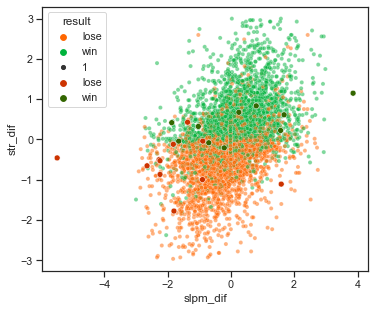

In [23]:
GREEN = '#00b33c'
ORANGE = '#ff6600'
OVERLAY_GREEN = '#336600'
OVERLAY_ORANGE = '#cc3300'
FEATURE = 'slpm_dif'
ax = plt.subplots(figsize=(6,5), dpi=70)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=all_data[all_data.outlier==False], hue='result',palette=[ORANGE,GREEN],hue_order=['lose','win'], alpha=0.5, size=1)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=data, hue='result', palette=[OVERLAY_ORANGE,OVERLAY_GREEN],hue_order=['lose','win'], alpha=1)

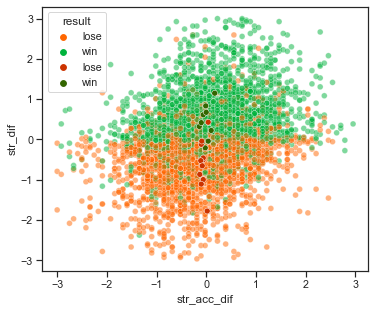

In [24]:
GREEN = '#00b33c'
ORANGE = '#ff6600'
OVERLAY_GREEN = '#336600'
OVERLAY_ORANGE = '#cc3300'
FEATURE = 'str_acc_dif'
ax = plt.subplots(figsize=(6,5), dpi=70)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=all_data[all_data.outlier==False], hue='result',palette=[ORANGE,GREEN],hue_order=['lose','win'],alpha=0.5)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=data, hue='result', palette=[OVERLAY_ORANGE,OVERLAY_GREEN],hue_order=['lose','win'], alpha=1)

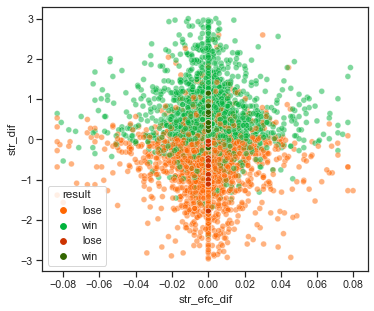

In [26]:
GREEN = '#00b33c'
ORANGE = '#ff6600'
OVERLAY_GREEN = '#336600'
OVERLAY_ORANGE = '#cc3300'
FEATURE = 'str_efc_dif'
ax = plt.subplots(figsize=(6,5), dpi=70)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=all_data[all_data.outlier==False], hue='result',palette=[ORANGE,GREEN],hue_order=['lose','win'],alpha=0.5)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=data, hue='result', palette=[OVERLAY_ORANGE,OVERLAY_GREEN],hue_order=['lose','win'], alpha=1)

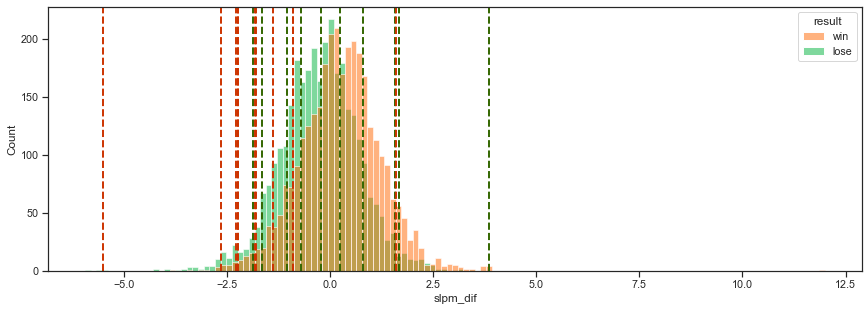

In [27]:
FEATURE = 'slpm_dif'
ax = plt.subplots(figsize=(15,5), dpi=70)
ax = sns.histplot(x=FEATURE, data=all_data, hue='result', palette=[ORANGE,GREEN])
for value,result in zip(data.slpm_dif,data.result):
    COLOR = OVERLAY_GREEN if result=='win' else OVERLAY_ORANGE
    ax.axvline(x=value, color=COLOR, linestyle="--")

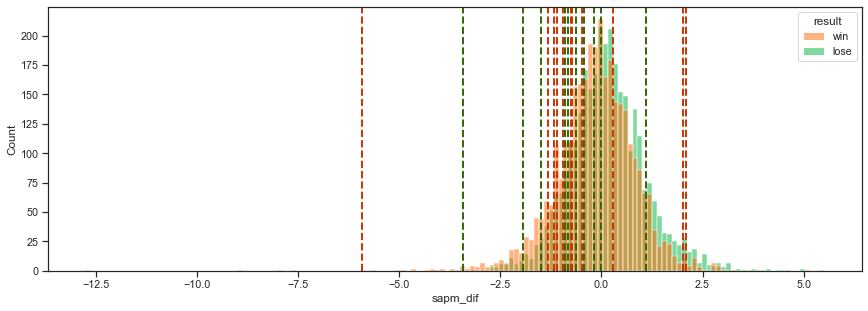

In [28]:
FEATURE = 'sapm_dif'
ax = plt.subplots(figsize=(15,5), dpi=70)
ax = sns.histplot(x=FEATURE, data=all_data, hue='result', palette=[ORANGE,GREEN])
for value,result in zip(data.sapm_dif,data.result):
    COLOR = OVERLAY_GREEN if result=='win' else OVERLAY_ORANGE
    ax.axvline(x=value, color=COLOR, linestyle="--")

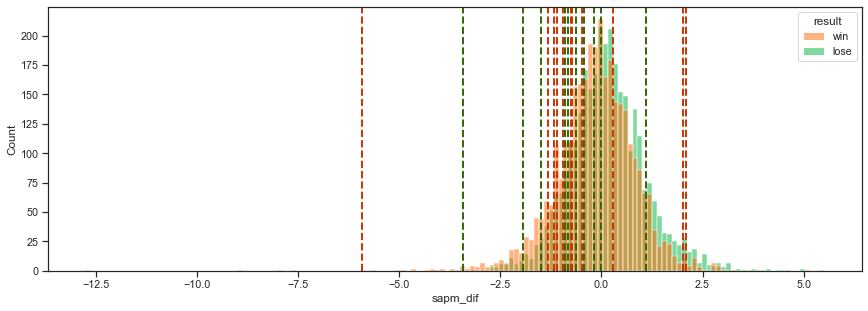

In [29]:
FEATURE = 'sapm_dif'
ax = plt.subplots(figsize=(15,5), dpi=70)
ax = sns.histplot(x=FEATURE, data=all_data, hue='result', palette=[ORANGE,GREEN])
for value,result in zip(data.sapm_dif,data.result):
    COLOR = OVERLAY_GREEN if result=='win' else OVERLAY_ORANGE
    ax.axvline(x=value, color=COLOR, linestyle="--")

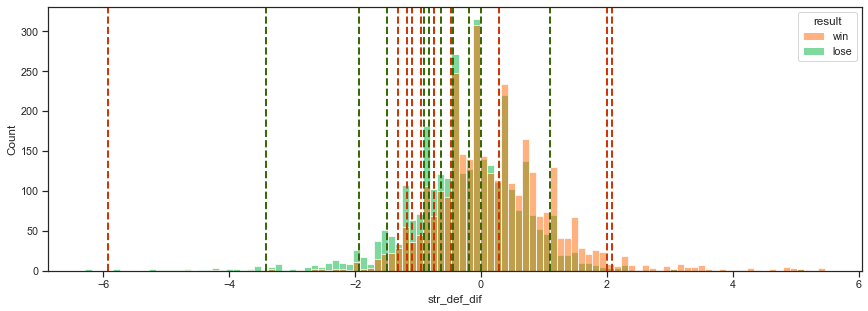

In [30]:
FEATURE = 'str_def_dif'
ax = plt.subplots(figsize=(15,5), dpi=70)
ax = sns.histplot(x=FEATURE, data=all_data, hue='result', palette=[ORANGE,GREEN])
for value,result in zip(data.sapm_dif,data.result):
    COLOR = OVERLAY_GREEN if result=='win' else OVERLAY_ORANGE
    ax.axvline(x=value, color=COLOR, linestyle="--")